Saving تصویر صفحه 2025-06-15 171223.png to تصویر صفحه 2025-06-15 171223 (1).png


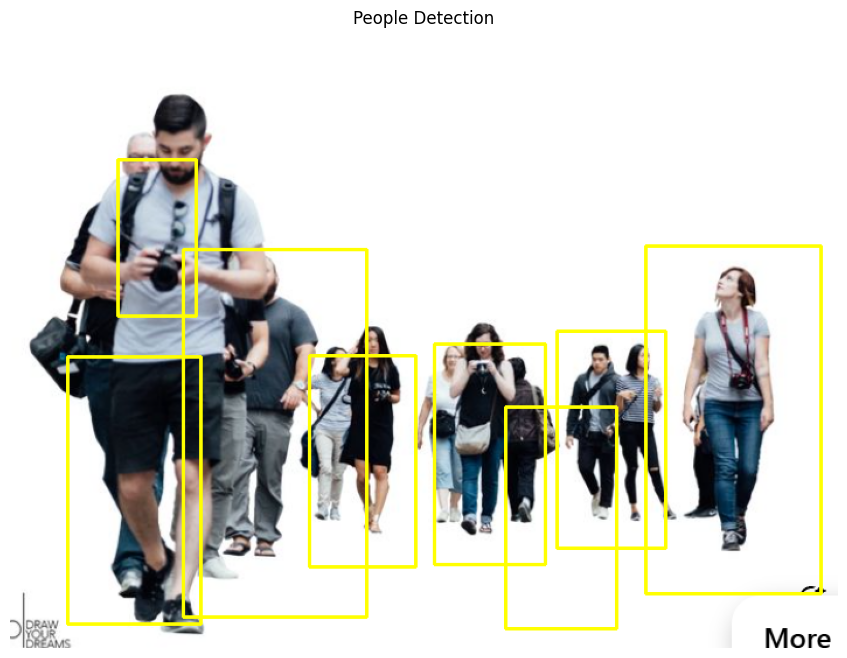

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

# ▶️ Upload image file
uploaded = files.upload()

# Get the name of the uploaded file
image_path = next(iter(uploaded))

# Function to check if one rectangle is completely inside another
def is_inside(o, i):
    ox, oy, ow, oh = o
    ix, iy, iw, ih = i
    return ox > ix and oy > iy and ox + ow < ix + iw and oy + oh < iy + ih

# Function to draw a rectangle around a detected person
def draw_person(image, person):
    x, y, w, h = person
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)

# Load the uploaded image
img = cv2.imread(image_path)

# Create HOG descriptor and set the default people detector using SVM
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Apply person detection to the image
found, _ = hog.detectMultiScale(img)

# Filter out rectangles that are fully contained within other rectangles
found_filtered = []
for ri, r in enumerate(found):
    for qi, q in enumerate(found):
        if ri != qi and is_inside(r, q):
            break
    else:
        found_filtered.append(r)

# Draw rectangles around detected people
for person in found_filtered:
    draw_person(img, person)

# Convert BGR to RGB for correct display with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the final image with bounding boxes
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.title("People Detection")
plt.axis('off')
plt.show()
